In [15]:
# %%
# Python standard library
import math
import random

# custom utils
from utils import display_maze
from examples.dense_maze_4x3 import maze
from itertools import product

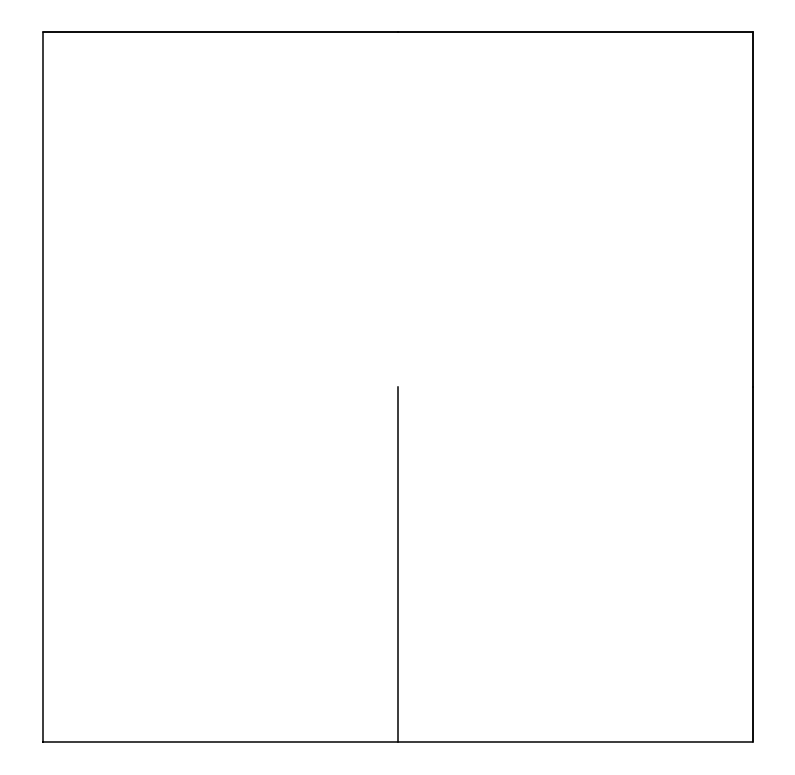

In [10]:
#display_maze(maze)

vertices = set([ (0,0),
                 (0,1),
                 (1,0),
                 (1,1)]) #cellules

edges = set([((0,0),(0,1)),
             ((0,1),(0,0)),
             ((1,1),(1,0)),
             ((1,0),(1,1)),
             ((1,1),(0,1)),
             ((0,1),(1,1))
             ]) #arêtes = chemins possibles (2 sens)
             
weights = { ((0,0),(0,1)):1, ((0,1),(0,0)):1} #poids des arêtes 

display_maze((vertices, edges, weights))



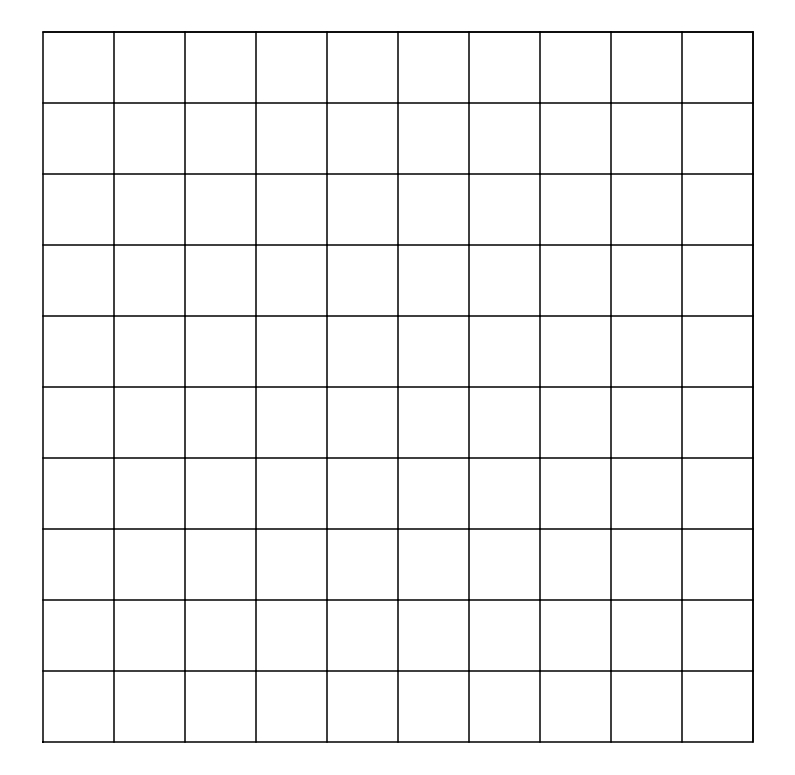

In [14]:
def full_maze(width, height):
    L = []
    for i in range(width): #mieux d'utiliser le produit cartésien 
        for j in range(height):
            L.append((i,j))
    vertices = set(L)
    edges = set() #ensemble vide 
    weights = {}
    display_maze((vertices, edges,weights))

#correction (autre proposition): 
def full_maze2(width,heigth):
    vertices = set()
    for col,row in product(range(width),range(height)): #on pourrait aussi faire un set compréhension : càd : vertices = set((col,raw) for col, raw in product(range(width),range(height)))
        vertices.add((col,raw))
    edges = set()
    weights = {}

full_maze(10,10)

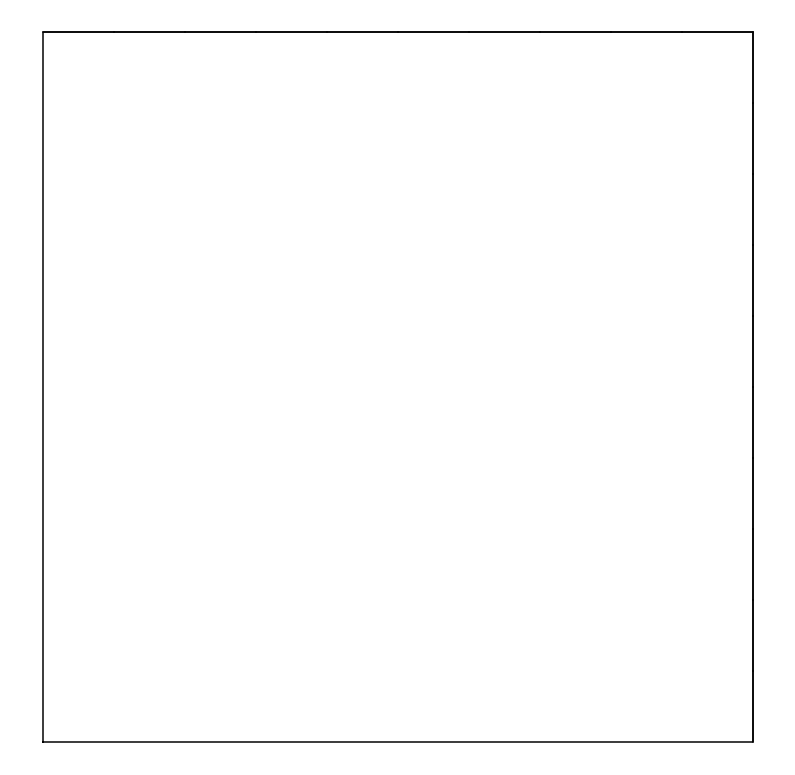

In [32]:
from random import randint

def empty_maze(width, height):
    vertices = set()
    for col,row in product(range(width),range(height)):
        vertices.add((col,row))
    edges_vert = {((col,row),(col,row+1)) for col in range(width) for row in range(height-1)} #vertical
    edges_hor = {((col,row),(col+1,row))for col in range(width-1) for row in range(height)} #horizontal 
    edges = edges_vert|edges_hor #fait l'union des ensembles (pour avoir la bare : alt + maj + l)
    weights = {}
    return vertices, edges, weights 


display_maze((empty_maze(10,10)))


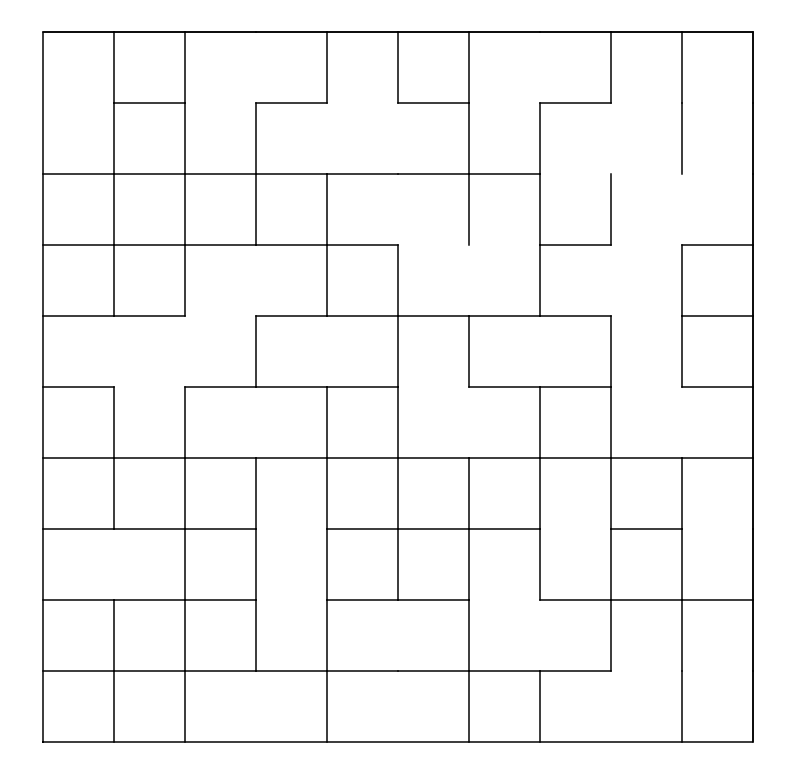

In [34]:
def labyrinthe(width, height): 
    vertices, edges, weights = empty_maze(width, height)
    edges = {edge for edge in edges if (randint(1,4)==1)} #pour qu'il reste des murs par rapport au cadre tout blanc, on supprime aléatoirement (on en choisit 1 sur 4) des arêtes comme ça on rajoute des murs
    weights = {edge:1 for edge in edges}

    display_maze((vertices, edges,weights))

labyrinthe(10,10)

In [44]:
directions = [ (0, +1), (0,-1), (+1,0), (-1,0)]

from random import choice

def maze(width, height, starting_point = (0,0)):
    vertices = {(col, row) for col in range(width) for row in range(height)}
    edges = {}

    to_visit = {starting_point}
    visited = set()
    while len(to_visit) > 0 :
        current = random.choice(list(to_visit)) #pour appliquer choice il faut avoir une liste 
        col, row = current 

        voisins = [(col + dcol, row + drow) for dcol,drow in directions if (col+dcol, row + drow) in vertices] # ou alors au lieu du if on fait .intersection(vertices) #intersection pour être sûr qu'on ne sort pas du cadre 
        
        candidates = voisins - visited - to_visit
        if len(candidtates)==0:
            break 
        if len(candidates)>0:
            new = random.choice(list(candidates))
            edges.add((current, new))
            edges.add((new,current))
            to_visit.add(new)
        if len(candidate) <= 1: #on s'arrête pour ne pas casser tous les murs 
            visited.add(current)
            to_visit.remove(current)

    weights = { edge : 1 for edge in edges}
    return vertices, edges, weights 

display_maze(maze(4,4))

TypeError: unsupported operand type(s) for -: 'list' and 'set'